Epoch 0, Cost: 0.6931
Epoch 100, Cost: 0.5641
Epoch 200, Cost: 0.5258
Epoch 300, Cost: 0.4946
Epoch 400, Cost: 0.4682
Epoch 500, Cost: 0.4455
Epoch 600, Cost: 0.4253
Epoch 700, Cost: 0.4073
Epoch 800, Cost: 0.3910
Epoch 900, Cost: 0.3761


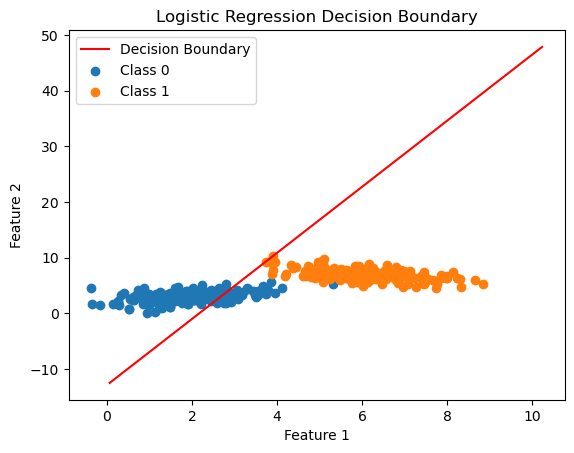

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
num_samples = 200
mean_1 = [2, 3]
cov_1 = [[1, 0.5], [0.5, 1]]
class_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples)

mean_2 = [6, 7]
cov_2 = [[1, -0.5], [-0.5, 1]]
class_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples)

X = np.vstack((class_1, class_2))
y = np.hstack((np.zeros(num_samples), np.ones(num_samples)))

X_bias = np.hstack((np.ones((2*num_samples, 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, num_epochs, learning_rate):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    
    for epoch in range(num_epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        
        gradient = np.dot(X.T, (h - y)) / num_samples
        theta -= learning_rate * gradient
        
        if epoch % 100 == 0:
            cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
            print(f"Epoch {epoch}, Cost: {cost:.4f}")
    
    return theta

num_epochs = 1000
learning_rate = 0.01

theta = logistic_regression(X_bias, y, num_epochs, learning_rate)

plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 0')
plt.scatter(class_2[:, 0], class_2[:, 1], label='Class 1')
x_boundary = np.array([min(X[:, 1]), max(X[:, 1])])
y_boundary = -(theta[0] + theta[1]*x_boundary) / theta[2]
plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()


Accuracy: 0.8975
Precision: 0.8299
Recall: 1.0000
F1-Score: 0.9070


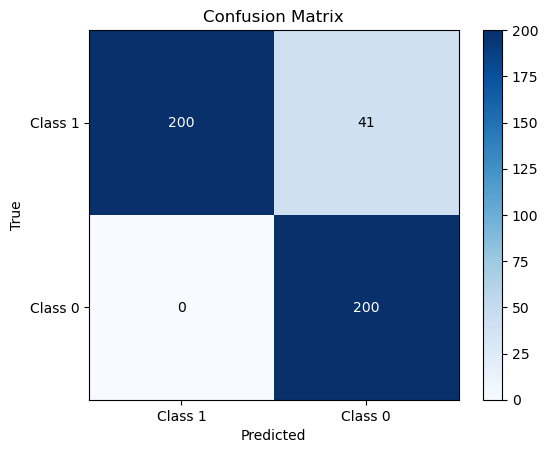

In [18]:
predictions = sigmoid(np.dot(X_bias, theta))
predicted_classes = predictions >= 0.5

accuracy = np.mean(predicted_classes == y)
print(f"Accuracy: {accuracy:.4f}")

true_positive = np.sum(predicted_classes[y == 1])
false_positive = np.sum(predicted_classes[y == 0])
false_negative = np.sum(~predicted_classes[y == 1])

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

confusion_matrix = np.array([[true_positive, false_positive], [false_negative, num_samples]])
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)

plt.text(0, 0, str(confusion_matrix[0, 0]), ha='center', va='center', color='white')
plt.text(1, 1, str(confusion_matrix[1, 1]), ha='center', va='center', color='white')
plt.text(1, 0, str(confusion_matrix[0, 1]), ha='center', va='center', color='black')
plt.text(0, 1, str(confusion_matrix[1, 0]), ha='center', va='center', color='black')

plt.xticks(tick_marks, ['Class 1', 'Class 0'])
plt.yticks(tick_marks, ['Class 1', 'Class 0'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()